In [127]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snb
from sklearn.preprocessing import LabelEncoder

In [1]:
print("hello word")

hello word


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [27]:

df= pd.read_csv('diabetic_data.csv', delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 101766 rows and 50 columns


In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [74]:
for i in df.columns:
    if np.array(df[i].value_counts())[0]>101750:
        print(df[i].value_counts())


No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No    101766
Name: examide, dtype: int64
No    101766
Name: citoglipton, dtype: int64
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [76]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [77]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [78]:
df['encounter_id'].value_counts()

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64

In [81]:
df.drop(['glimepiride-pioglitazone','metformin-pioglitazone','patient_nbr','encounter_id','weight','acetohexamide','troglitazone','examide','citoglipton'],axis=1,inplace=True)

In [87]:
df.replace('?',np.nan,inplace=True)

In [101]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,df[i].isna().sum()*100/len(df))

race 2.2335554114340743
payer_code 39.5574160328597
medical_specialty 49.08220820313268
diag_1 0.020635575732562937
diag_2 0.3517874339170253
diag_3 1.398305917497003


In [103]:
df.drop(['payer_code','medical_specialty'],axis=1,inplace=True)

In [123]:
df.dropna(inplace=True)

In [124]:
df['race'].isna().sum()

0

In [130]:
df=df[df.gender!='Unknown/Invalid']

In [131]:
df['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [143]:
Transformer=LabelEncoder()
for i in df.columns:
    Transformer.fit(df[i])
    if df[i].dtype==object: df[i]=Transformer.transform(df[i])

C:\Users\nicol\AppData\Local\Temp\ipykernel_4012\3827894055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if df[i].dtype==object: df[i]=Transformer.transform(df[i])


In [146]:
df[~df.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [147]:
df.dtypes

race                        int32
gender                      int32
age                         int32
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int32
A1Cresult                   int32
metformin                   int32
repaglinide                 int32
nateglinide                 int32
chlorpropamide              int32
glimepiride                 int32
glipizide                   int32
glyburide                   int32
tolbutamide                 int32
pioglitazone                int32
rosiglitazone               int32
acarbose      

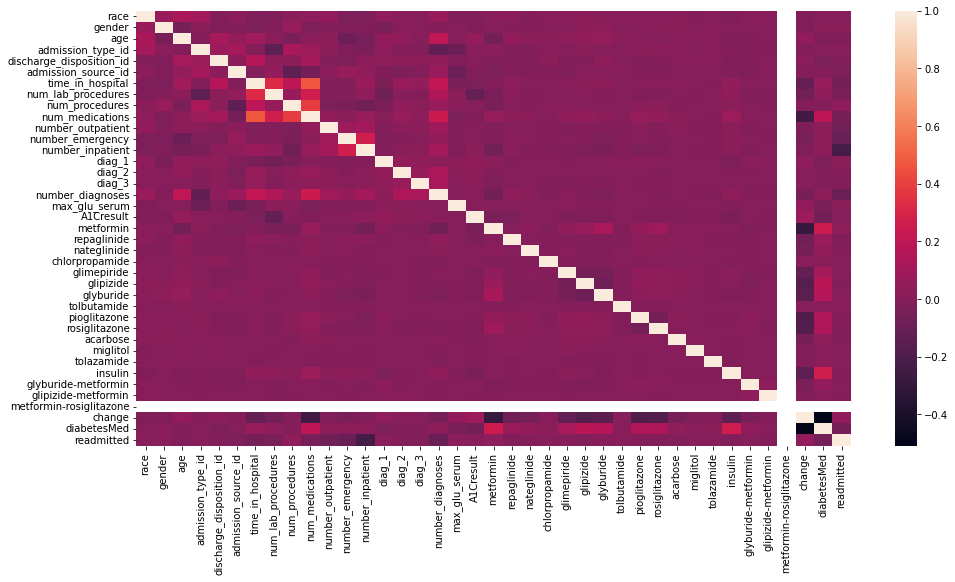

In [153]:
plt.figure(figsize=(16,8))
corr_matrix = df.corr()
snb.heatmap(corr_matrix)
plt.show()